https://blog.csdn.net/qq_41577045/article/details/79859902

https://blog.csdn.net/lilong117194/article/details/78204994

https://blog.csdn.net/SummerStoneS/article/details/78551757

http://www.blogjava.net/zhenandaci/

https://www.cnblogs.com/lianyingteng/p/7811126.html


In [162]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pylab

%matplotlib inline

In [208]:
def plot_hyperplane(svc, X, h = 0.01):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.2)

#X为训练样本，Y为训练样本标签(1和-1)，T为测试样本
def plot_svm_boundary(X, Y, T, svc):
    #拟合训练样本
    svc.fit(X, Y)
    
    #预测
    Y_pre = svc.predict(T)

    #绘制支持向量散点图
    X_sv = svc.support_vectors_
    Y_sv = np.copy(svc.support_)
    for i in range(len(Y_sv)):
        Y_sv[i] = Y[Y_sv[i]]
    plt.scatter(X_sv[:, 0], X_sv[:, 1], c=Y_sv, cmap=plt.cm.Spectral, marker='o', s=100)

    #绘制训练样本散点图
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)

    #绘制测试样本散点图
    plt.scatter(T[:, 0], T[:, 1], c=Y_pre, cmap=plt.cm.Spectral, marker='*')

    #绘制超平面
    plot_hyperplane(svc, X)
    
    plt.title("SVM: " + str(svc.kernel))
    
    return Y_pre, svc.n_support_, svc.support_, svc.support_vectors_

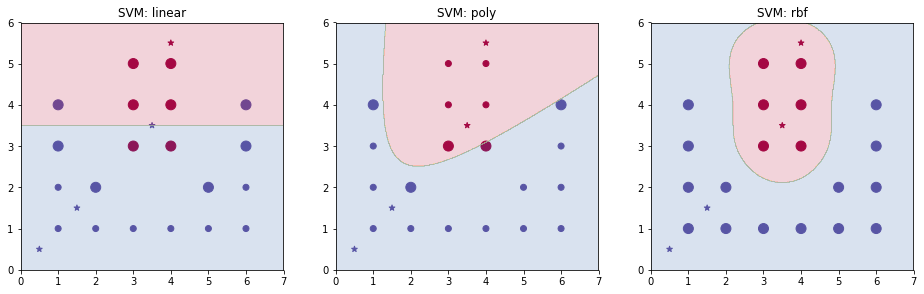

predicts: [ 1  1 -1 -1]
counts: [ 6 14]
indexs: [14 15 16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
vectors: [[3. 3.]
 [3. 4.]
 [3. 5.]
 [4. 3.]
 [4. 4.]
 [4. 5.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [2. 1.]
 [2. 2.]
 [3. 1.]
 [4. 1.]
 [5. 1.]
 [5. 2.]
 [6. 1.]
 [6. 2.]
 [6. 3.]
 [6. 4.]]


In [233]:
pylab.rcParams['figure.figsize'] = (16.0, 10.0) # 显示大小

X = np.array([[1,1],[1,2],[1,3],[1,4],[2,1],[2,2],[3,1],[4,1],[5,1],[5,2],[6,1],[6,2],[6,3],[6,4],[3,3],[3,4],[3,5],[4,3],[4,4],[4,5]])
Y = np.array([1]*14 + [-1]*6)
T = np.array([[0.5,0.5],[1.5,1.5],[3.5,3.5],[4,5.5]])

#Norm = float(abs(max(X[:, 0].max(), X[:, 1].max())))
#X = X / Norm
#T = T / Norm
plt.subplot(2, 3, 1)
Y_pre, sv_count, sv_indexs, sv_vectors = plot_svm_boundary(X, Y, T, SVC(kernel="linear", gamma=1, coef0=0))
plt.subplot(2, 3, 2)
Y_pre, sv_count, sv_indexs, sv_vectors = plot_svm_boundary(X, Y, T, SVC(kernel="poly", degree=2, gamma=1, coef0=0))
plt.subplot(2, 3, 3)
Y_pre, sv_count, sv_indexs, sv_vectors = plot_svm_boundary(X, Y, T, SVC(kernel="rbf", gamma=1, coef0=0))
plt.show()

print("predicts:", Y_pre)      #输出预测结果
print("counts:", sv_count)     #输出正类和负类支持向量总个数
print("indexs:", sv_indexs)    #输出正类和负类支持向量索引
print("vectors:", sv_vectors)  #输出正类和负类支持向量

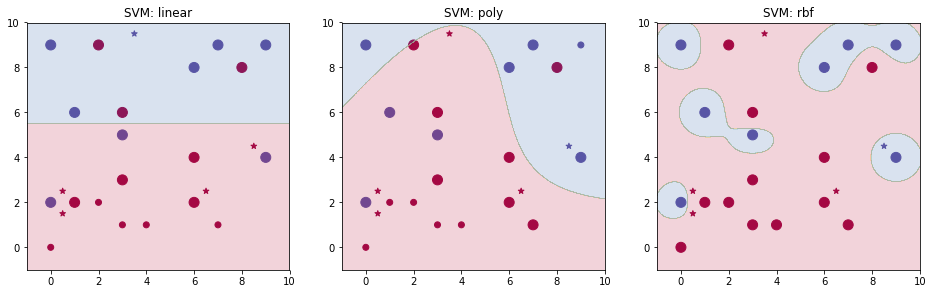

predicts: [-1  1 -1 -1 -1]
counts: [12  8]
indexs: [ 8  9 10 11 12 13 14 15 16 17 18 19  0  1  2  3  4  5  6  7]
vectors: [[3. 1.]
 [0. 0.]
 [6. 2.]
 [3. 6.]
 [2. 2.]
 [4. 1.]
 [1. 2.]
 [7. 1.]
 [2. 9.]
 [8. 8.]
 [6. 4.]
 [3. 3.]
 [6. 8.]
 [3. 5.]
 [7. 9.]
 [9. 4.]
 [1. 6.]
 [0. 9.]
 [0. 2.]
 [9. 9.]]


In [238]:
pylab.rcParams['figure.figsize'] = (16.0, 10.0) # 显示大小

np.random.seed(888)

Num = 20

X_x = np.random.randint(0, 10, Num)
X_y = np.random.randint(0, 10, Num)
Y_positive = np.random.randint(5, 15)
T_x = np.random.randint(0, 10, 5) + 0.5
T_y = np.random.randint(0, 10, 5) + 0.5

X = np.c_[X_x, X_y]
Y = np.array([1]*(Y_positive) + [-1]*(Num - Y_positive))
T = np.c_[T_x, T_y]

plt.subplot(2, 3, 1)
Y_pre, sv_count, sv_indexs, sv_vectors = plot_svm_boundary(X, Y, T, SVC(kernel="linear", gamma=1, coef0=0))
plt.subplot(2, 3, 2)
Y_pre, sv_count, sv_indexs, sv_vectors = plot_svm_boundary(X, Y, T, SVC(kernel="poly", degree=3, gamma=1, coef0=0))
plt.subplot(2, 3, 3)
Y_pre, sv_count, sv_indexs, sv_vectors = plot_svm_boundary(X, Y, T, SVC(kernel="rbf", gamma=1, coef0=0))
plt.show()   

print("predicts:", Y_pre)      #输出预测结果
print("counts:", sv_count)     #输出正类和负类支持向量总个数
print("indexs:", sv_indexs)    #输出正类和负类支持向量索引
print("vectors:", sv_vectors)  #输出正类和负类支持向量

In [230]:
print(SVC())
print('''
C是松弛变量的系数 
kernel是要定义核函数的名字，跟后面的系数也息息相关 
gamma是这三个核函数的乘系数 
degree是对多项式核函数来的。。。 
coef0是另外两个核函数里的r 
probability是可以允许多分类的情况 
class_weight是可以实现给不同类别设不同的权重
''')

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

C是松弛变量的系数 
kernel是要定义核函数的名字，跟后面的系数也息息相关 
gamma是这三个核函数的乘系数 
degree是对多项式核函数来的。。。 
coef0是另外两个核函数里的r 
probability是可以允许多分类的情况 
class_weight是可以实现给不同类别设不同的权重

